## DSBDAL Assignment 5

## Data analytics II

#### Importing required libraries

In [1]:
import pandas as pd
import string
#from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

#### Loading the dataset

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

#### Checking for missing values

In [4]:
missing_values_count = data.isnull().sum() ## summing up the null value counts for all columns 
missing_values_count

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

#### Dropping User ID

In [6]:
data.drop(['User ID'], axis = 1,inplace = True)

#### Changing categorical values of gender into numerical values 

In [7]:
data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [8]:
data.Gender.replace("Male","0",inplace = True)
data.Gender.replace("Female","1",inplace = True)
data.Gender = data.Gender.astype(int)

#### Visualizing the data 

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

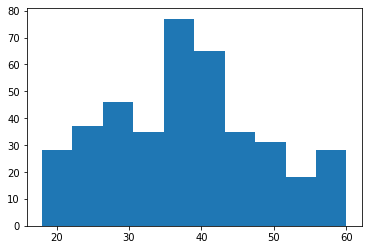

In [9]:
plt.hist(data['Age'], bins=10)

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

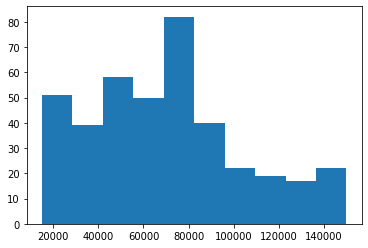

In [10]:
plt.hist(data['EstimatedSalary'], bins=10)

#### Removing the outliers

<AxesSubplot:xlabel='Age'>

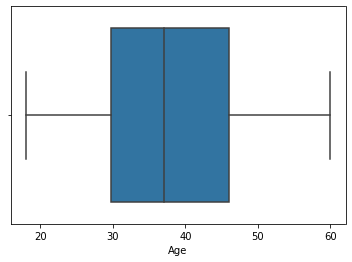

In [15]:
sns.boxplot(x = data['Age'])

<AxesSubplot:xlabel='EstimatedSalary'>

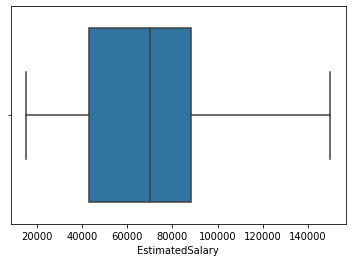

In [16]:
sns.boxplot(x = data['EstimatedSalary'])

In [17]:
## No outliers found 

#### Using the min max scaler on all the features

In [18]:
X = np.array(data.iloc[:,0:3])
y = np.array(data.iloc[:,-1]).reshape(-1, 1)
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape,y.shape)

(400, 3) (400, 1)


#### Performing the train-test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Training the model

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.81


### Evaluating the model

#### (i) Plotting the confusion matrix 

In [21]:
confusion_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

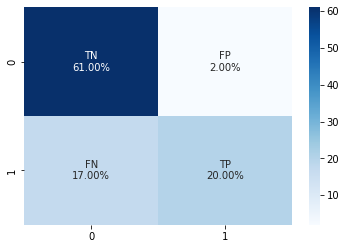

In [22]:
l1 = ['TN','FP','FN','TP']
l2 = ['{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(l1,l2)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, cmap='Blues',fmt='')

#### (ii) Calculating the accuracy score

In [88]:
accuracy_score(y_test,y_pred)

0.8

#### (iii) Calculating the error rate 

In [89]:
1 - accuracy_score(y_test,y_pred)

0.19999999999999996

#### (iv) Calculating the precision

In [90]:
precision_score(y_test,y_pred)
## Precision = TP/ (TP + FP)

0.8846153846153846

#### (v) Calculating the recall

In [91]:
recall_score(y_test,y_pred)
## Recall = TP/ (TP + FN)

0.575

#### (vi) Calculating the f1-score

In [92]:
## F-1 score = (2 *precison * recall) / (precision + recall)

f1_score(y_test,y_pred)

0.696969696969697